In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint

In [120]:
year, state = 2014, 'TX'
u_feat, u_thresh = 'SCHL', 16
s_feat, s_thresh = 'RAC1P', 1

epsilon = 4e-3
v_init = 1e-4
forgetting_factor = 0.1

In [121]:
year_range = np.arange(year, 2024)
year_range = np.delete(year_range, np.where(year_range==2020))

In [122]:
reports = []

for year in year_range:
    df = pd.read_csv(f'results/initial_forgetting_tests/{year}-{state}_{u_feat}-{int(u_thresh)}_{s_feat}-{int(s_thresh)}_{epsilon}-{v_init}-{forgetting_factor}.csv', index_col=[0,1])
    df['year'] = year
    reports.append(df)

reports = pd.concat(reports)
reports.sort_index(inplace=True)

In [123]:
scaled_invariance = reports.xs('invariance', level=1, drop_level=False)[['U = 1', 'U = 0']] / reports.xs('original_invariance', level=1)[['U = 1', 'U = 0']].values
scaled_invariance['year'] = reports.xs('invariance', level=1, drop_level=False)['year']

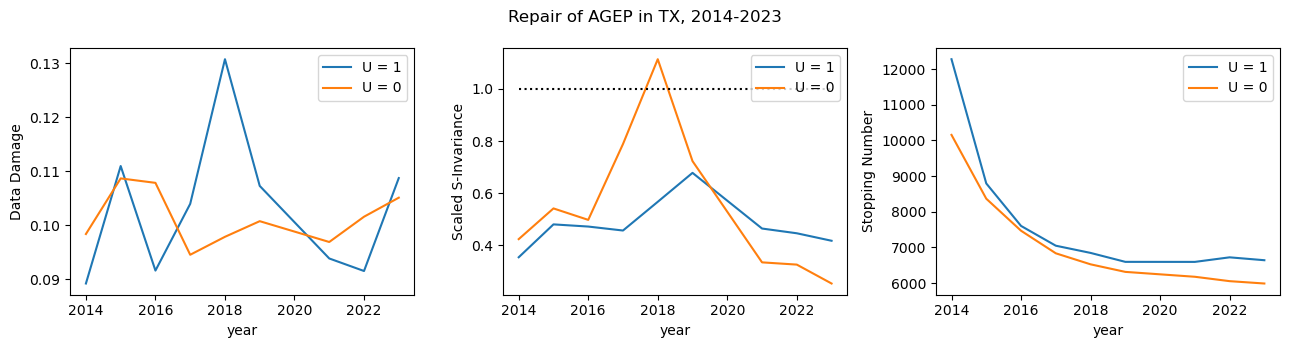

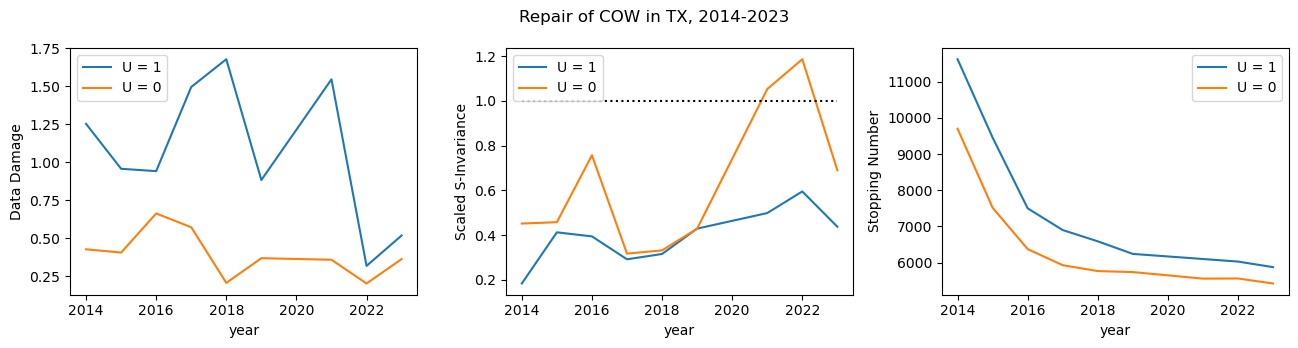

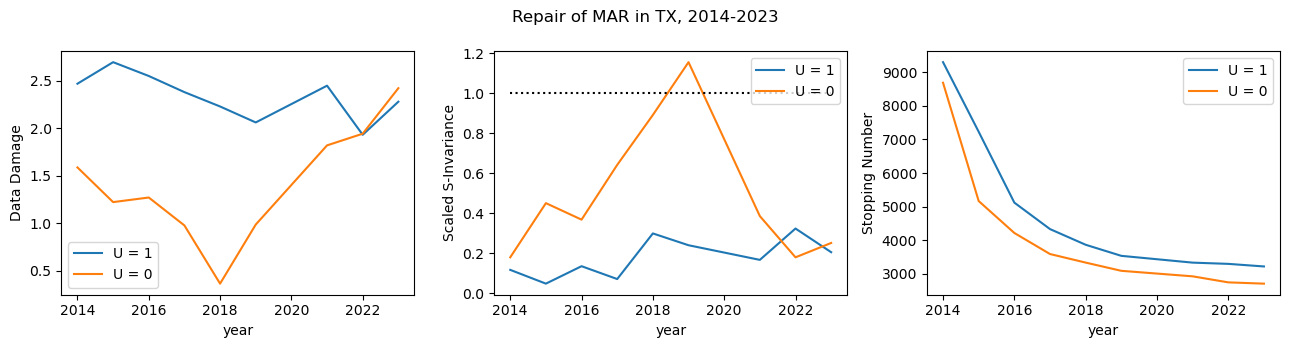

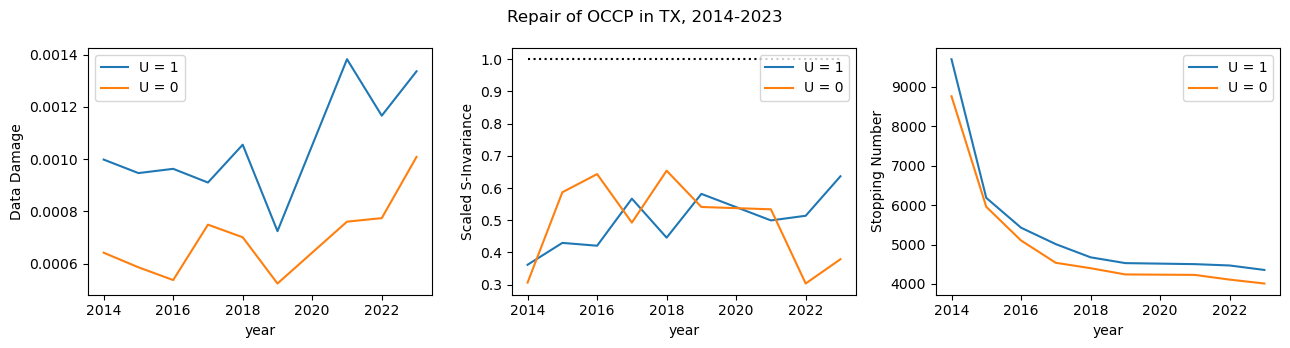

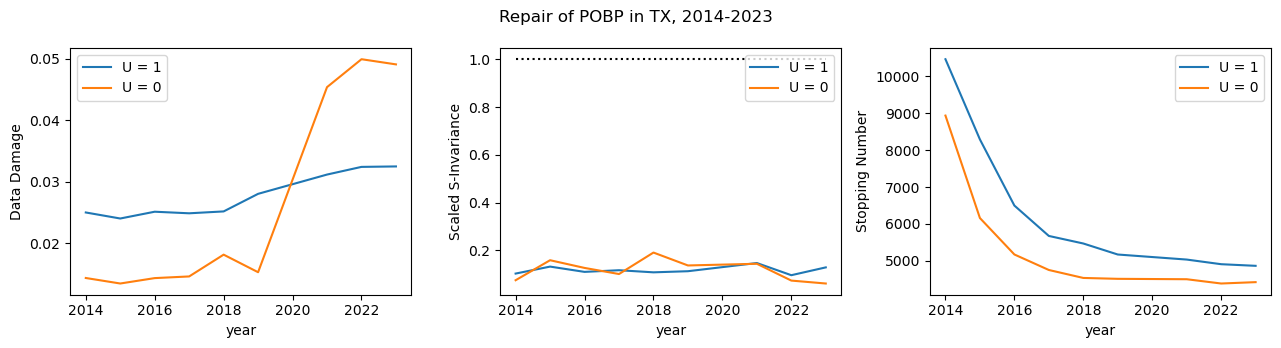

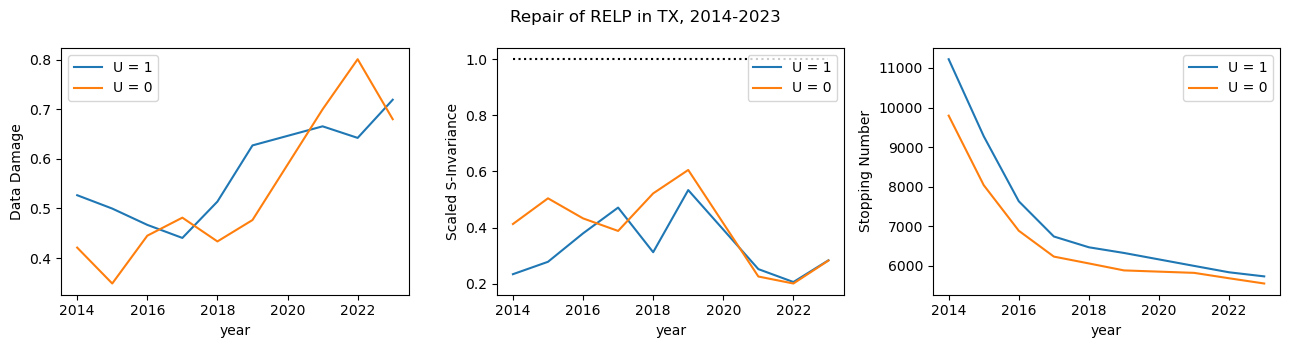

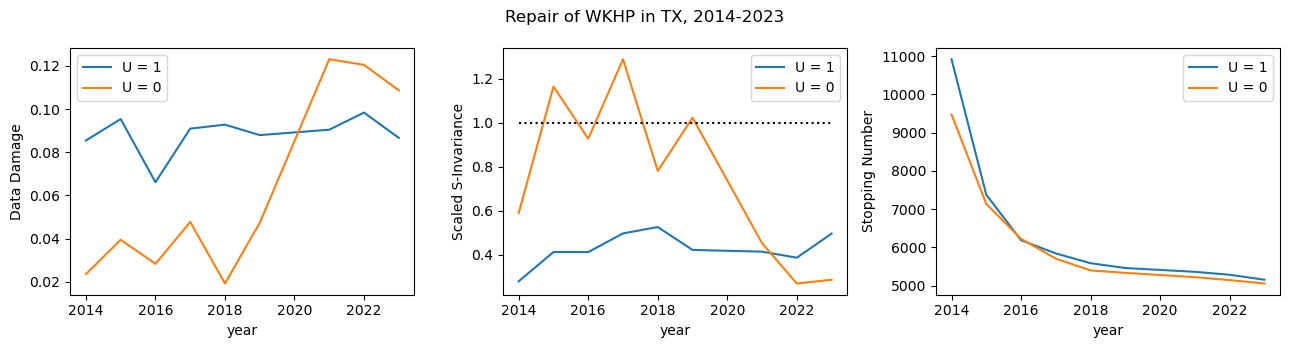

In [124]:
for f in reports.index.get_level_values(0).unique():

    fig, axs = plt.subplots(1, 3, figsize=(13,3.5), sharex=True)
    fig.suptitle(f'Repair of {f} in {state}, {year_range[0]}-{year_range[-1]}')

    reports.loc[(f, 'damage')].plot(x='year', y='U = 1', ax=axs[0])
    reports.loc[(f, 'damage')].plot(x='year', y='U = 0', ax=axs[0])
    axs[0].set_ylabel('Data Damage')

    scaled_invariance.loc[(f, 'invariance')].plot(x='year', y='U = 1', ax=axs[1])
    scaled_invariance.loc[(f, 'invariance')].plot(x='year', y='U = 0', ax=axs[1])
    axs[1].hlines(y=1, xmin=year_range[0], xmax=year_range[-1], colors='k', linestyles='dotted')
    axs[1].set_ylabel('Scaled S-Invariance')

    reports.loc[(f, 'n')].plot(x='year', y='U = 1', ax=axs[2])
    reports.loc[(f, 'n')].plot(x='year', y='U = 0', ax=axs[2])
    axs[2].set_ylabel('Stopping Number')

    fig.tight_layout()